In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.expand_frame_repr", False)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('game_product_data.csv')

In [5]:
print(df.head())

   listing_id  product_id  sku_id  retailer_id  points  geography_id  publisher_id  industry_id  importance release_date  lifecycle  current_age_months  remaining_lifecycle_months
0      529407        3829   33998         1243       0            78             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
1      529559        3831   27559         1243       0            78             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
2      529676        3831   27559         1246       0            89             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
3      529681        3830   27384         1246       0            89             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
4      529707        1030   14621         1246       0            89             1            1     

In [6]:
df = df.dropna()
df.drop(columns='release_date', inplace = True)

In [7]:
df.columns

Index(['listing_id', 'product_id', 'sku_id', 'retailer_id', 'points',
       'geography_id', 'publisher_id', 'industry_id', 'importance',
       'lifecycle', 'current_age_months', 'remaining_lifecycle_months'],
      dtype='object')

In [8]:
listing_id = df['listing_id']
product_id =  df['product_id']
sku_id = df['product_id']
retailer_id = df['retailer_id']
points = df['points']
geography_id = df['geography_id']
publisher_id = df['publisher_id']
industry_id = df['industry_id']
importance = df['importance']
lifecycle  = df['lifecycle']
current_age_months = df['current_age_months']
remaining_lifecycle_months = df['remaining_lifecycle_months']


In [23]:
from scipy.stats import skew

print(skew(listing_id))
print(skew(product_id))
print(skew(sku_id))
print(skew(retailer_id))
print(skew(points))
print(skew(geography_id))
print(skew(publisher_id))
print(skew(industry_id))
print(skew(importance))
print('lifecycle', skew(lifecycle))
print(skew(current_age_months))
print(skew(remaining_lifecycle_months))

-0.3099297966852937
-0.007708305774224076
-0.007708305774224076
0.9471844981929054
2.9387056011794255
-0.10591854890407583
2.270535513947896
nan
0.6561784796513161
lifecycle 1.6802438551654568
2.190780697329946
145.49468966572937


<ipython-input-23-d0278ad80f67>:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(skew(industry_id))


In [13]:
print(lifecycle.head())

0    18.0
1    18.0
2    18.0
3    18.0
4    36.0
Name: lifecycle, dtype: float64


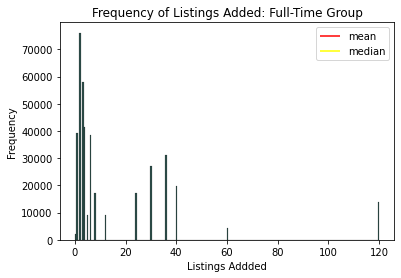

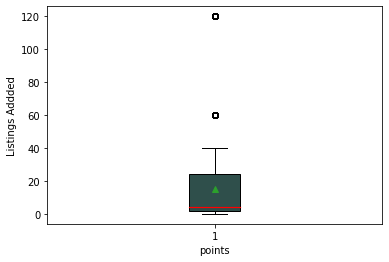

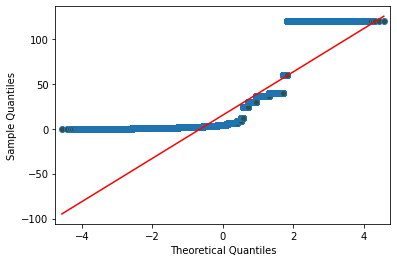

In [15]:
from statsmodels.graphics.gofplots import qqplot

sns.histplot(points, color='#2f4f4b', alpha= 1)
plt.vlines(points.mean(),ymin=0,ymax=20,color='red',label='mean')
plt.vlines(points.median(),ymin=0,ymax=20,color='yellow',label='median')
plt.ylabel('Frequency')
plt.xlabel('Listings Addded')
plt.title('Frequency of Listings Added: Full-Time Group')
plt.legend()
plt.show()
plt.boxplot(points, showmeans=True, patch_artist=True, boxprops={'facecolor': '#2f4f4b'},medianprops={'color': 'red', 'linewidth': 1.2})
plt.ylabel('Listings Addded')
plt.xlabel('points')
qqplot(points, line='s',markerfacecolor='#2f4f4b')
plt.show()

In [15]:
# Define a threshold to identify outliers (e.g., using the Z-score)
threshold = 2  # Adjust this threshold as needed

# Calculate the mean and standard deviation of the 'lifecycle' column
mean = df['lifecycle'].mean()
std_dev = df['lifecycle'].std()

# Calculate the Z-score for each value in the 'lifecycle' column
z_scores = (df['lifecycle'] - mean) / std_dev

# Identify and filter out rows with outliers based on the threshold
filtered_df = df[np.abs(z_scores) < threshold]
filtered_lifecycle = filtered_df['lifecycle']

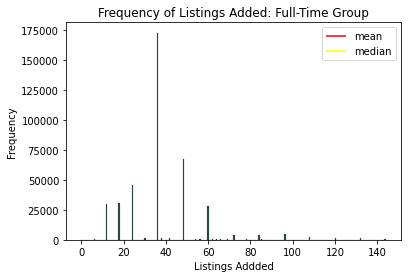

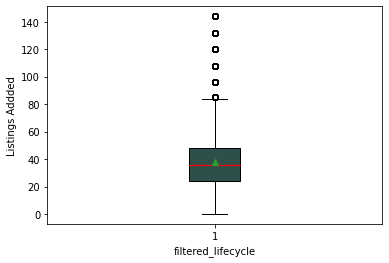

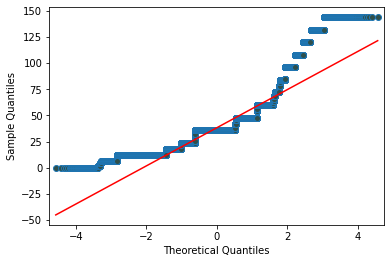

In [17]:
from statsmodels.graphics.gofplots import qqplot

sns.histplot(filtered_lifecycle, color='#2f4f4b', alpha= 1)
plt.vlines(filtered_lifecycle.mean(),ymin=0,ymax=100,color='red',label='mean')
plt.vlines(filtered_lifecycle.median(),ymin=0,ymax=100,color='yellow',label='median')
plt.ylabel('Frequency')
plt.xlabel('Listings Addded')
plt.title('Frequency of Listings Added: Full-Time Group')
plt.legend()
plt.show()
plt.boxplot(filtered_lifecycle, showmeans=True, patch_artist=True, boxprops={'facecolor': '#2f4f4b'},medianprops={'color': 'red', 'linewidth': 1.2})
plt.ylabel('Listings Addded')
plt.xlabel('filtered_lifecycle')
qqplot(filtered_lifecycle, line='s',markerfacecolor='#2f4f4b')
plt.show()

In [24]:
grouped_df = df.groupby('publisher_id').agg({
    'sku_id': 'nunique',
    'product_id': 'nunique',
    'retailer_id': 'nunique',
    'points': ['sum', 'median'],  
    'importance': lambda x: x.mode().iloc[0],
    'remaining_lifecycle_months': 'median',
    'geography_id': 'nunique',
    'publisher_id': 'size'
 }).reset_index()

In [25]:
print(grouped_df)

    publisher_id  sku_id product_id retailer_id  points        importance remaining_lifecycle_months geography_id publisher_id
                 nunique    nunique     nunique     sum median   <lambda>                     median      nunique         size
0              1    1298         50         930  257739    4.0        2.0                       16.0           77        20585
1              2    1620         60        1014  299713    4.0        1.0                       24.0           79        24132
2              3    1764        110         983  401275    4.0        1.0                        4.0           79        28536
3              4    1542         69         913  327091    4.0        1.0                        2.0           78        22616
4              5     261         26         597   50087    4.0        2.0                       29.0           73         3386
5              6    1079         94         799  209690    4.0        2.0                       15.0           

In [27]:
grouped_df.columns = [
    'publisher_id',
    'num_skus',
    'num_products',
    'num_retailers',
    'total_points',
    'points_mean',
    'importance_mode',
    'remaining_lifecycle_months_mean',
    'num_geographies',
    'num_listings'
]

In [28]:
import math

penalty = lambda x: max(0, (math.exp(6 - x) -1) * (-2000))

# Rest of the code remains the same
weights = {
    'num_listings': 1.5,
    'num_skus': -3,
    'num_products': -7,
    'num_retailers': -180,
    'total_points': 2,
    'points_mean': 1,
    'importance_mode': 1,
    'remaining_lifecycle_months_mean': 100,
    'num_geographies': 0.5    
}

grouped_df['weighted_score'] = (
    grouped_df['num_listings'] * weights['num_listings'] +
    grouped_df['remaining_lifecycle_months_mean'] * weights['remaining_lifecycle_months_mean'] +
    grouped_df['importance_mode'] * weights['importance_mode'] +
    grouped_df['total_points'] * weights['total_points'] +
    grouped_df['points_mean'] * weights['points_mean'] +
    grouped_df['num_geographies'] * weights['num_geographies'] +
    grouped_df['num_retailers'] * weights['num_retailers'] +
    grouped_df['num_skus'] * weights['num_skus'] +
    grouped_df['num_products'] * weights['num_products'] +
    grouped_df['remaining_lifecycle_months_mean'].apply(penalty)
)


In [29]:
grouped_df = grouped_df.sort_values(by=['weighted_score'], ascending=False)


     publisher_id  num_skus  num_products  num_retailers  total_points  points_mean  importance_mode  remaining_lifecycle_months_mean  num_geographies  num_listings  weighted_score
2               3      1764           110            983        401275          4.0              1.0                              4.0               79         28536   662796.500000
15             19      2426            87            885        377481          4.0              2.0                             15.0               78         28790   634504.753180
3               4      1542            69            913        327091          4.0              1.0                              2.0               78         22616   518901.000000
16             20       896           111            742        287740          5.0              2.0                             14.0               74         18198   469195.329075
1               2      1620            60           1014        299713          4.0            

In [31]:
grouped_df.to_csv('weighted_publishers_final.csv')

In [48]:

final_df = pd.read_csv('final_prod_data.csv')

In [51]:
final_df.head()

,listing_id,product_id,sku_id,retailer_id,points,geography_id,publisher_id,industry_id,importance,release_date,lifecycle,current_age_months,remaining_lifecycle_months
0,359,8,24,48,4,54,2,1,1.0,2018-09-07,96.0,59.0,37.0
1,527,662,12686,78,4,58,1,1,2.0,2020-11-17,36.0,33.0,3.0
2,672,11,58,6,30,2,1,1,4.0,2019-02-26,60.0,53.0,7.0
3,673,11,58,90,1,5,1,1,4.0,2019-02-26,60.0,53.0,7.0
4,674,11,58,19,1,15,1,1,4.0,2019-02-26,60.0,53.0,7.0


In [53]:
final_df = final_df.drop(columns = ['release_date','current_age_months'])

In [58]:
final_df = final_df.drop(columns = ['industry_id'])


In [59]:
final_df.head()

,listing_id,product_id,sku_id,retailer_id,points,geography_id,publisher_id,importance,lifecycle,remaining_lifecycle_months
0,359,8,24,48,4,54,2,1.0,96.0,37.0
1,527,662,12686,78,4,58,1,2.0,36.0,3.0
2,672,11,58,6,30,2,1,4.0,60.0,7.0
3,673,11,58,90,1,5,1,4.0,60.0,7.0
4,674,11,58,19,1,15,1,4.0,60.0,7.0


In [ ]:
final_df

In [62]:
final_grouped_df = final_df.groupby('publisher_id').agg({
    'sku_id': 'nunique',
    'product_id': 'nunique',
    'retailer_id': 'nunique',
    'points': ['sum', 'median'],  
    'importance': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'remaining_lifecycle_months': 'median',
    'geography_id': 'nunique',
    'listing_id': 'nunique'
 }).reset_index()

In [63]:
final_grouped_df


publisher_id  sku_id product_id retailer_id  points        importance remaining_lifecycle_months geography_id listing_id
                 nunique    nunique     nunique     sum median   <lambda>                     median      nunique    nunique
0              1    1318         50         932  258712    4.0        2.0                       15.0           77      20620
1              2    1631         60        1016  300526    4.0        1.0                       23.0           79      24143
2              3    1826        116         986  407709    4.0        1.0                        3.0           79      28870
3              4    1518         66         910  313038    4.0        1.0                        1.0           78      21755
4              5     274         31         603   51725    4.0        2.0                       29.0           73       3446
5              6    1094         98         801  210857    4.0        2.0                       14.0           75      14564
6              7     102          5         529   20442    4.0        2.0                        2.0           72       1612
7              8     963         51         729  218696    4.0        1.0                       19.0           74      15332
8             10     426         32         778   62368    4.0        1.0                        8.0           77       4419
9             11    1482        115         887  280524    4.0        2.0                       13.0           77      20380
10            12     356         16         813  100199    4.0        1.0                        3.0           77       7204
11            14      80         15         284   13107    4.0        3.0                       13.0           65        898
12            15    1446        141         833  276926    4.0        2.0                       20.0           76      18536
13            16     156         26         421   30457    6.0        4.0                       18.0           70       1595
14            17     427         49         828   77902    4.0        2.0                        7.0           76       5332
15            19    2515         91         889  384053    4.0        2.0                       15.0           79      29261
16            20     905        112         743  290022    5.0        2.0                       14.0           74      18321
17            22     763         42         840  122589    4.0        1.0                        9.0           78       8547
18            24     442         57         634   83805    4.0        2.0                       14.0           73       5667
19            27     637         37         693  120116    5.0        2.0                       24.0           75       7677
20            28       2          1           3      75   36.0        1.0                        4.0            3          3
21            29      18          2         146    3964    5.0        2.0                       15.0           42        241
22            32      16          5         189    3651    4.0        3.0                        6.0           63        232
23            33      68         16         173   11819    6.0        3.0                       20.0           58        776
24            36    1055        139         620  169782    4.0        3.0                        7.0           74      10571
25            37     279          9         825   38513    4.0        1.0                        4.0           78       3067
26            40       4          2          15     426   36.0        3.0                       26.0            8         15
27            42      61         10         180   10561    6.0        4.0                       25.0           58        551
28            43     103         14         263   17966    6.0        2.0                       35.0           59        806
29            44     266         53         426   53461    8.0        3.0                        4.0           69       2445
30  

In [43]:
print(final_grouped_df)

    publisher_id  sku_id product_id retailer_id  points        importance remaining_lifecycle_months geography_id publisher_id
                 nunique    nunique     nunique     sum median   <lambda>                     median      nunique         size
0              1    1298         50         930  257739    4.0        2.0                       16.0           77        20585
1              2    1620         60        1014  299713    4.0        1.0                       24.0           79        24132
2              3    1764        110         983  401275    4.0        1.0                        4.0           79        28536
3              4    1542         69         913  327091    4.0        1.0                        2.0           78        22616
4              5     261         26         597   50087    4.0        2.0                       29.0           73         3386
5              6    1079         94         799  209690    4.0        2.0                       15.0           

In [ ]:
final_grouped_df.to_csv('weighted_publishers_final2.csv')

In [ ]:
final_grouped_df = final_df.groupby('publisher_id').agg({
    'sku_id': 'nunique',
    'product_id': 'nunique',
    'retailer_id': 'nunique',
    'points': ['sum', 'median'],  
    'importance': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'remaining_lifecycle_months': 'median',
    'geography_id': 'nunique',
    'listing_id': 'nunique'
 }).reset_index()